Probability Density Plots to observe tyre wear over various measures.

# Outline for exploratory paper

1. Tyre usage 
    - How long was each tire used for
2. How effective was each tire
    - Break down delta from each individual driver's best lap time of stint
    - Compare data from each team
3. When was each tyre used
    - Compare over total race distance
    - Compare data from each team
    
Introduction:
    - There is so much data collected by teams, and with further innovation in terms of sensors and data capture, the capabilities and practices of data analysis and interpretation continue to grow as well. As expected, teams close guard specific data as it can lead to other teams understanding their strengths and weaknesses. What I have done is gathered lap time data (ergast API), and joined it to data found on racefans.net to observe how tyre compounds were used and performed over the course of the 2020 season. Approaching this from a strategists perspective, I wanted to gain insight to how each compound was used, how it performed, and when it was used. 
    - One of the unique characteristics of Formula 1 is how performance varies from team to team. While some teams may have a car that has better straight line speed, another team may have a car that is better at cornering. Additionally, the strengths and weaknesses of the drivers themselves obviously play a factor in overall performance. 
    - By using the data collected, we can get a broad sense of how the one common constraint, tyres, were used, performed, and how effective they were on a broad and focused perspective. 

In [174]:
import numpy as np
from numpy import diff
import scipy as sp
import pandas as pd
import plotly.express as px
from pandas import Series, DataFrame
import plotly.graph_objects as go
import scipy
import itertools
## loess regression model 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import statsmodels.api as sm
import seaborn as sns

path = 'master.csv'

full = pd.read_csv(path)
full.head()

full['dist_remain'] = full['race_distance'] - full['distance']

In [ ]:
isolate each tyre compound
group by raceid

plot km on x, density on right to get general tyre life
isolate to mcl, compare to direct rivals to see how tyre wear differs for competitors

group by raceid, lap on compound
plot sec (seconds off fastest lap on compound), density to get pace of tyre

group by raceid, find fastest lap of race
plot sec (seconds off fastest lap of race), density to get comparison pace

In [176]:
## isolate each compound to its own dataframe
#c1 = hardest, c5 = softest 

# c1 
c1 = full[(full.compound == 'C1')]
# c2 
c2 = full[(full.compound == 'C2')]
# c3
c3 = full[(full.compound == 'C3')]
# c4
c4 = full[(full.compound == 'C4')]
# c5
c5 = full[(full.compound == 'C5')]

## assign constructor to each driver


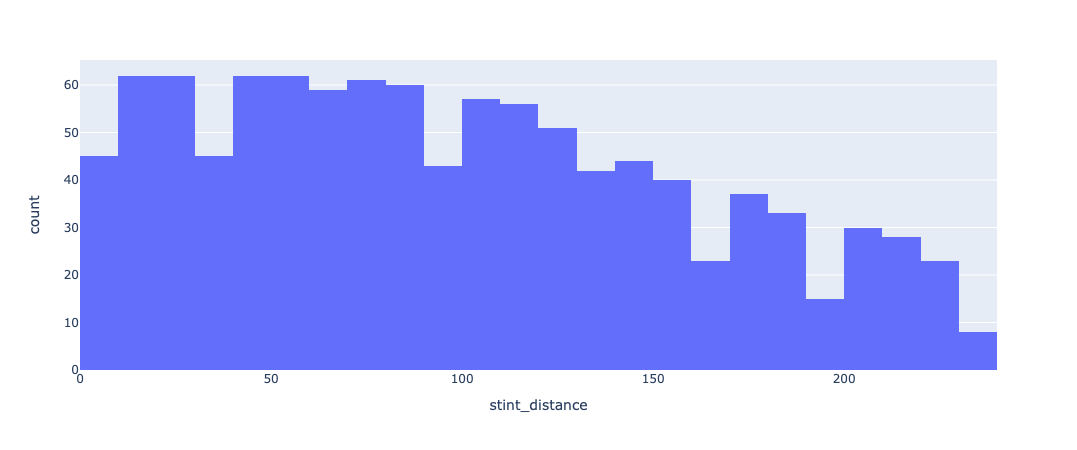

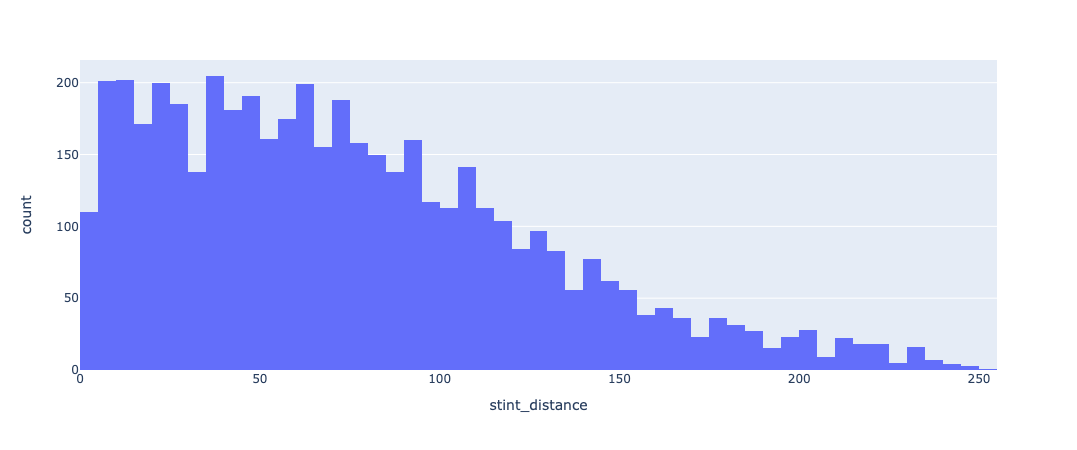

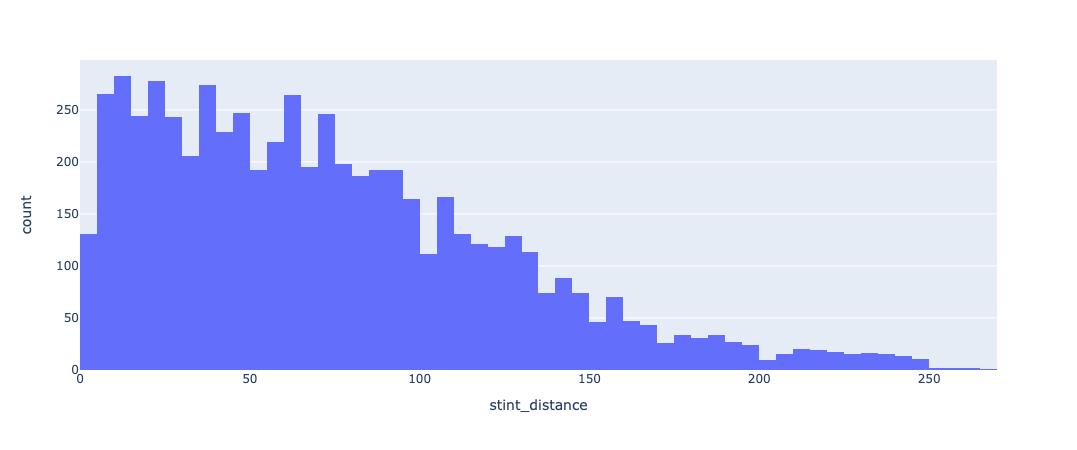

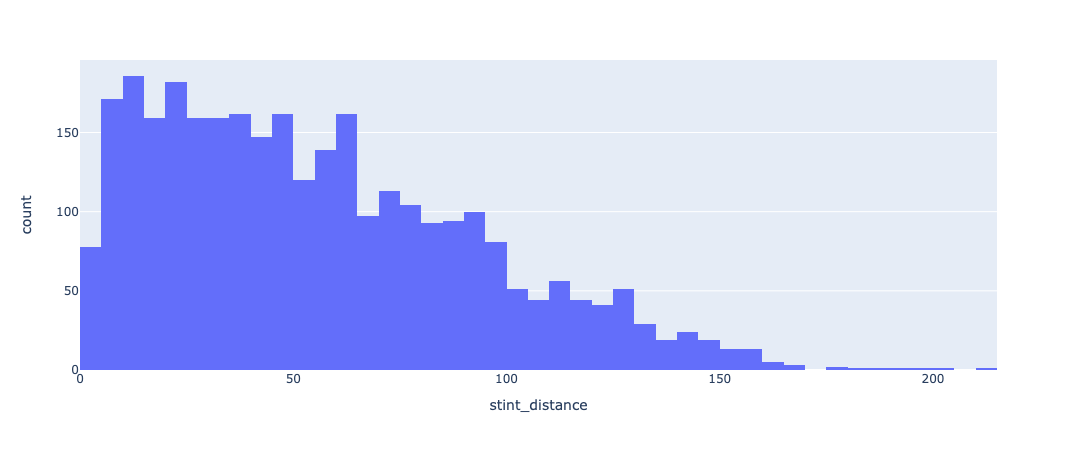

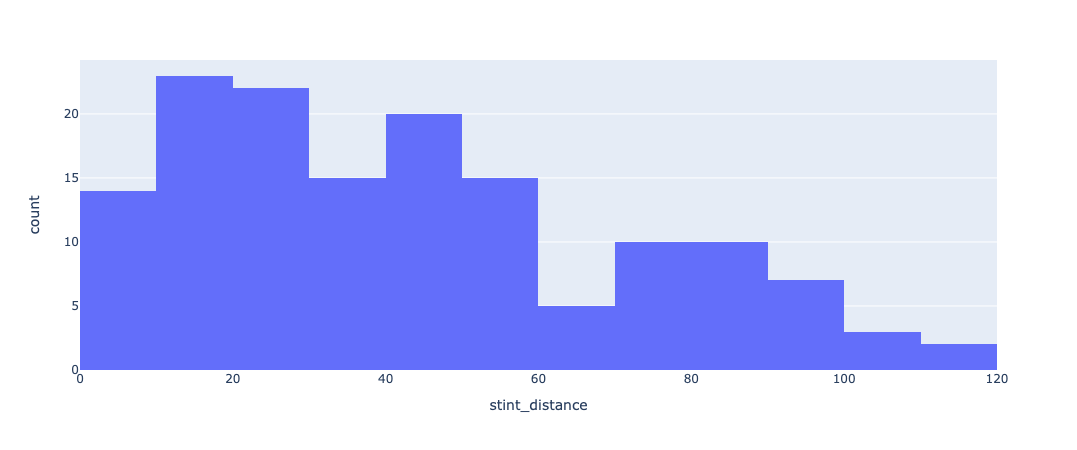

In [177]:
# to view probability density graph for each compound
# tells us what distances compound was used most for
# create histograms for each

# c1
c1_hist = px.histogram(c1, x = "stint_distance")
c1_hist.show()
#c2 
c2_hist = px.histogram(c2, x = "stint_distance")
c2_hist.show()
#c3 
c3_hist = px.histogram(c3, x = "stint_distance")
c3_hist.show()
#c4
c4_hist = px.histogram(c4, x = "stint_distance")
c4_hist.show()
#c5
c5_hist = px.histogram(c5, x = "stint_distance")
c5_hist.show()

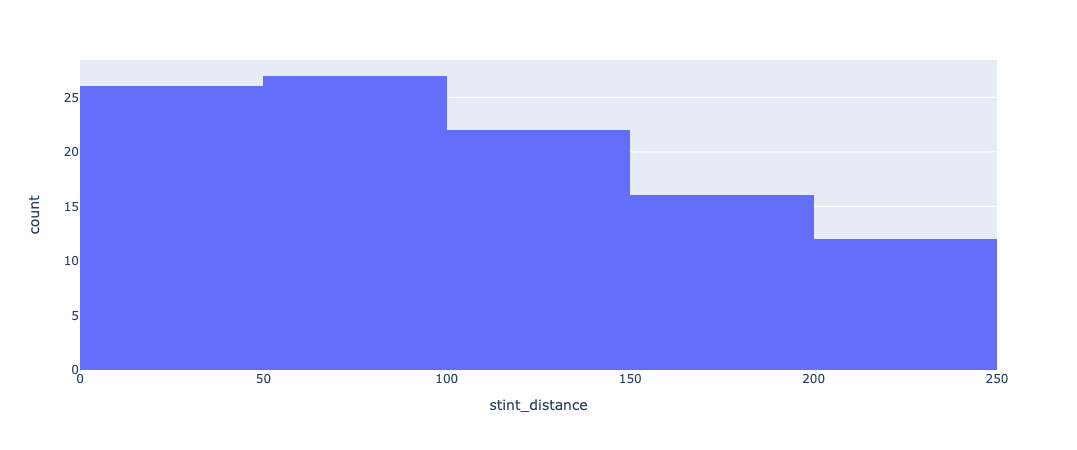

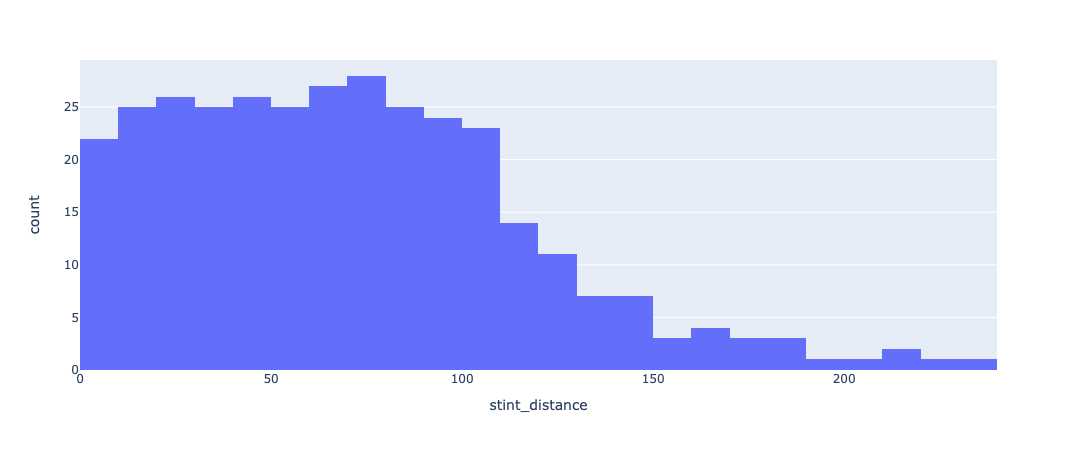

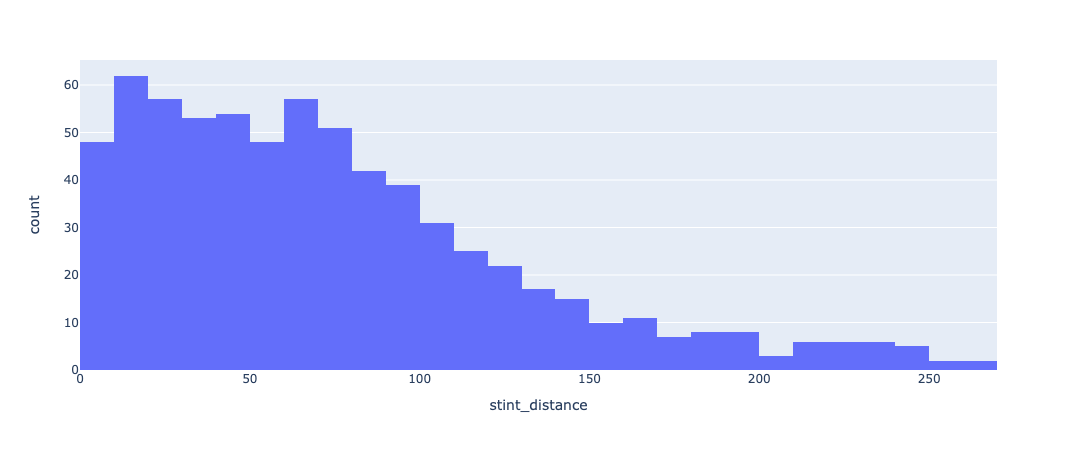

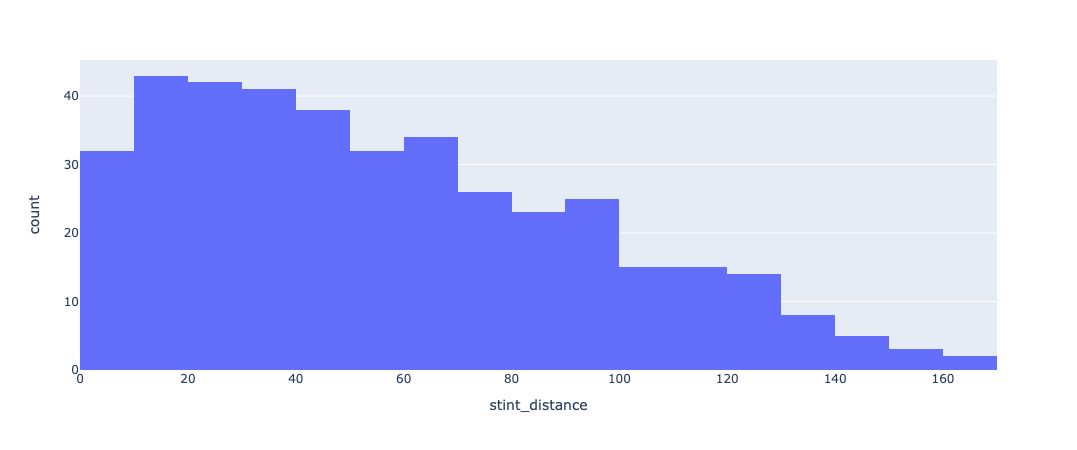

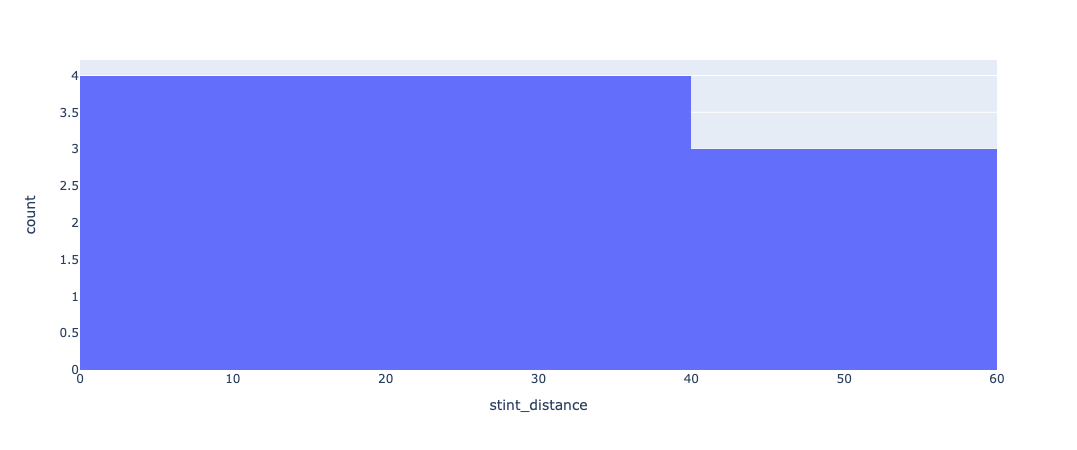

In [10]:
## box plot with team on x-axis, stint_distance for each compound on y-axis

In [116]:
constructors = c1.constructorRef


def get_constructors(constructors):

    list_of_constructors = []

    constructors = set(constructors)

    for constructors in constructors:
        list_of_constructors.append(constructors)

    return list_of_constructors


#print(get_constructors(constructors))
constructors = print(get_constructors(constructors))
constructors

['williams', 'racing_point', 'mclaren', 'renault', 'mercedes', 'alphatauri', 'ferrari', 'alfa', 'red_bull', 'haas']


/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function

Text(0, 0.5, 'Density')

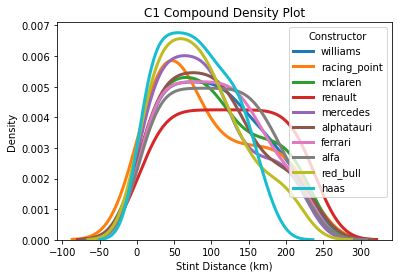

In [130]:
# Iterate through the five airlines
constructors = c1.constructorRef


def get_constructors(constructors):

    list_of_constructors = []

    constructors = set(constructors)

    for constructors in constructors:
        list_of_constructors.append(constructors)

    return list_of_constructors


#print(get_constructors(constructors))
constructors = get_constructors(constructors)
constructors


for constructor in constructors:
    # Subset to the constructor
    subset = c1[c1['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['stint_distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C1 Compound Density Plot')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Density')

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function

Text(0, 0.5, 'Density')

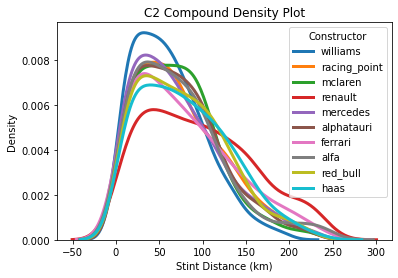

In [131]:
for constructor in constructors:
    # Subset to the constructor
    subset = c2[c2['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['stint_distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C2 Compound Density Plot')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Density')

I used a probability density plot to observe how long teams extended their stint on each tyre compound. 
The density represents how probable the random variable of stint distance (km) is likely to occur based on the known values taken from the dataset. If a team's stints on a compound are consistently longer (in km) based on the observed data, its probability density will be higher at that distance (km). This gives more weight to values that are observed more frequently and less to outliers. 


Looking at the plot, it makes sense that all teams have the highest density at stint distance (km) = 0, as that is when they are first fitted with the tyre. However as the stint progresses, teams will decide how long they'll want to remain on that tyre. Based on numerous factors such as tyre wear/degradation, race conditions, position, pace, etc., they may elect to pit again and switch tyre compounds. 

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function

Text(0, 0.5, 'Density')

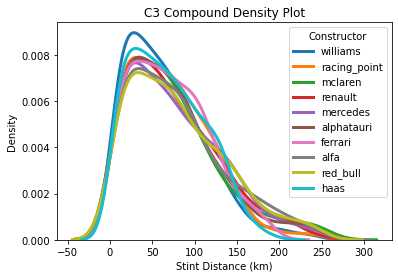

In [132]:
for constructor in constructors:
    # Subset to the constructor
    subset = c3[c3['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['stint_distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C3 Compound Density Plot')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Density')

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function

Text(0, 0.5, 'Density')

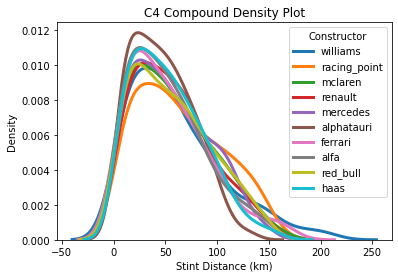

In [133]:
for constructor in constructors:
    # Subset to the constructor
    subset = c4[c4['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['stint_distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C4 Compound Density Plot')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Density')

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/Andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function

Text(0, 0.5, 'Density')

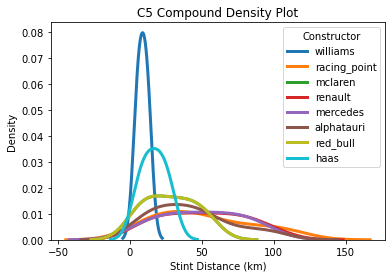

In [135]:
for constructor in constructors:
    # Subset to the constructor
    subset = c5[c5['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['stint_distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C5 Compound Density Plot')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Density')

## notes from histogram

C5 was used seldomly in comparison to other compounds-- when was this used?
C1/C2 really extended on stints 

plot delta from avg lt of stint (y) vs. stint distance (x)

To get a sense of when each compound was used, use race distance


2. How effective was each tire
    - Break down delta from each individual driver's best lap time of stint
    - Compare data from each team
    
Used loess regression, local regression, to observe tyre life of each compound.
Delta calculated per race, per stint, per driver. From each driver's stint, what distance did each tyre perform best? Degrade?

In [160]:

avg_lt = full.groupby(['raceid','code','stint']).agg({
    'seconds' : 'mean'}).reset_index()

constructors

['williams',
 'racing_point',
 'mclaren',
 'renault',
 'mercedes',
 'alphatauri',
 'ferrari',
 'alfa',
 'red_bull',
 'haas']

In [172]:
rs = pd.merge(full, avg_lt, how = "inner", on = ["raceid", "code", "stint"])

rs['sec_diff'] = rs['seconds_x'] - rs['seconds_y']
rs['dist_remain'] = rs['race_distance'] - rs['distance']

c1s = rs[rs.compound == 'C1']
c2s = rs[rs.compound == 'C2']
c3s = rs[rs.compound == 'C3']
c4s = rs[rs.compound == 'C4']
c5s = rs[rs.compound == 'C5']

#C1
c1s_mcl = c1s[c1s.constructorRef == 'mclaren']
c1s_rp = c1s[c1s.constructorRef == 'racing_point']
c1s_wil = c1s[c1s.constructorRef == 'williams']
c1s_ren = c1s[c1s.constructorRef == 'renault']
c1s_mer = c1s[c1s.constructorRef == 'mercedes']
c1s_at = c1s[c1s.constructorRef == 'alphatauri']
c1s_fer = c1s[c1s.constructorRef == 'ferrari']
c1s_alf = c1s[c1s.constructorRef == 'alfa']
c1s_rb = c1s[c1s.constructorRef == 'red_bull']
c1s_has = c1s[c1s.constructorRef == 'haas']

#C2
c2s_mcl = c2s[c2s.constructorRef == 'mclaren']
c2s_rp = c2s[c2s.constructorRef == 'racing_point']
c2s_wil = c2s[c2s.constructorRef == 'williams']
c2s_ren = c2s[c2s.constructorRef == 'renault']
c2s_mer = c2s[c2s.constructorRef == 'mercedes']
c2s_at = c2s[c2s.constructorRef == 'alphatauri']
c2s_fer = c2s[c2s.constructorRef == 'ferrari']
c2s_alf = c2s[c2s.constructorRef == 'alfa']
c2s_rb = c2s[c2s.constructorRef == 'red_bull']
c2s_has = c2s[c2s.constructorRef == 'haas']

# C3
c3s_mcl = c3s[c3s.constructorRef == 'mclaren']
c3s_rp = c3s[c3s.constructorRef == 'racing_point']
c3s_wil = c3s[c3s.constructorRef == 'williams']
c3s_ren = c3s[c3s.constructorRef == 'renault']
c3s_mer = c3s[c3s.constructorRef == 'mercedes']
c3s_at = c3s[c3s.constructorRef == 'alphatauri']
c3s_fer = c3s[c3s.constructorRef == 'ferrari']
c3s_alf = c3s[c3s.constructorRef == 'alfa']
c3s_rb = c3s[c3s.constructorRef == 'red_bull']
c3s_has = c3s[c3s.constructorRef == 'haas']

# C4
c4s_mcl = c4s[c4s.constructorRef == 'mclaren']
c4s_rp = c4s[c4s.constructorRef == 'racing_point']
c4s_wil = c4s[c4s.constructorRef == 'williams']
c4s_ren = c4s[c4s.constructorRef == 'renault']
c4s_mer = c4s[c4s.constructorRef == 'mercedes']
c4s_at = c4s[c4s.constructorRef == 'alphatauri']
c4s_fer = c4s[c4s.constructorRef == 'ferrari']
c4s_alf = c4s[c4s.constructorRef == 'alfa']
c4s_rb = c4s[c4s.constructorRef == 'red_bull']
c4s_has = c4s[c4s.constructorRef == 'haas']

# C5
c5s_mcl = c5s[c5s.constructorRef == 'mclaren']
c5s_rp = c5s[c5s.constructorRef == 'racing_point']
c5s_wil = c5s[c5s.constructorRef == 'williams']
c5s_ren = c5s[c5s.constructorRef == 'renault']
c5s_mer = c5s[c5s.constructorRef == 'mercedes']
c5s_at = c5s[c5s.constructorRef == 'alphatauri']
c5s_fer = c5s[c5s.constructorRef == 'ferrari']
c5s_alf = c5s[c5s.constructorRef == 'alfa']
c5s_rb = c5s[c5s.constructorRef == 'red_bull']
c5s_has = c5s[c5s.constructorRef == 'haas']


In [ ]:
# for loess regression

# filter each compound dataframe by constructor

# calculate lowess values for each team

# plot all lowess values on plot

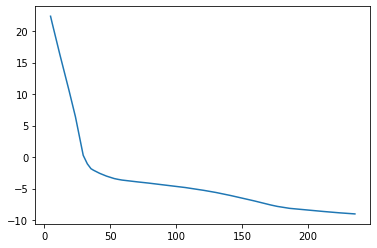

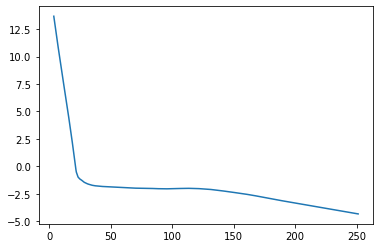

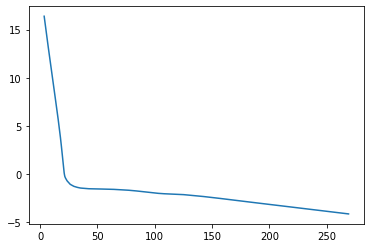

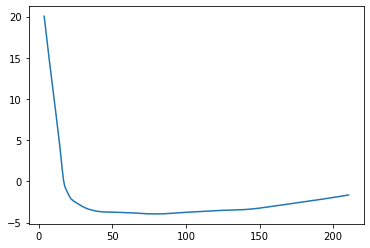

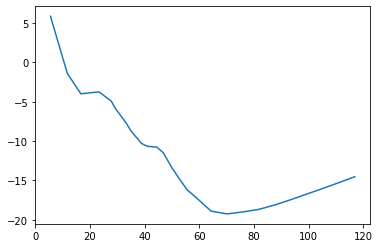

In [169]:
# calculates local regression prediction
def regress(data, xvar, yvar):
    lowess = sm.nonparametric.lowess(xvar, yvar, frac = .3)
    X = list(zip(*lowess))[0]
    Y = list(zip(*lowess))[1]
    return (X,Y)


# For article: Main Tyre Compounds
#c1
c1_main = regress(c1s, c1s.sec_diff, c1s.stint_distance)
#plt.plot(c1s.stint_distance, c1s.sec_diff, 'o')
plt.plot(c1_main[0], c1_main[1], '-')
plt.show()

#c2
c2_main = regress(c2s, c2s.sec_diff, c2s.stint_distance)
plt.plot(c2_main[0], c2_main[1], '-')
plt.show()

#c3
c3_main = regress(c3s, c3s.sec_diff, c3s.stint_distance)
plt.plot(c3_main[0], c3_main[1], '-')
plt.show()

#c4
c4_main = regress(c4s, c4s.sec_diff, c4s.stint_distance)
plt.plot(c4_main[0], c4_main[1], '-')
plt.show()

#c5
c5_main = regress(c5s, c5s.sec_diff, c5s.stint_distance)
plt.plot(c5_main[0], c5_main[1], '-')
plt.show()


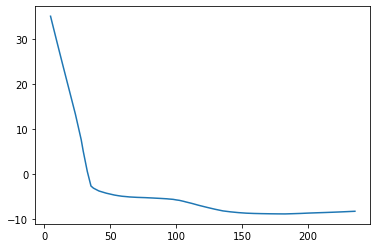

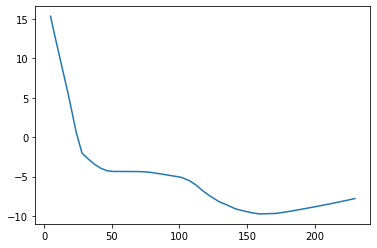

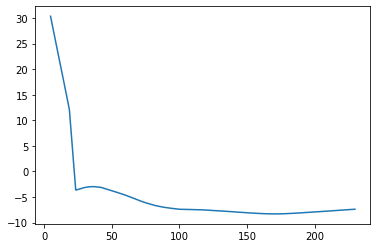

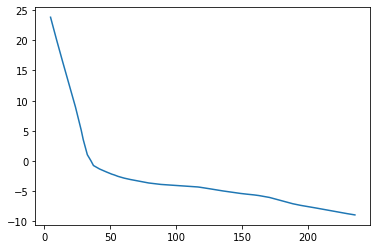

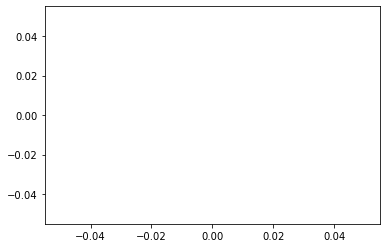

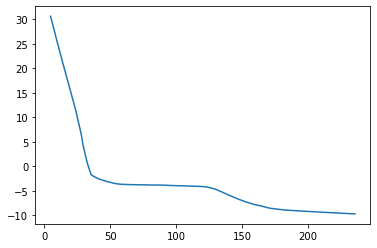

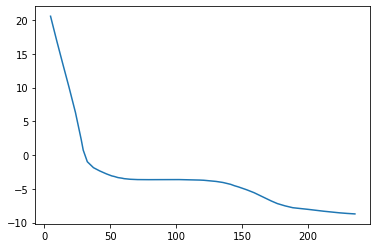

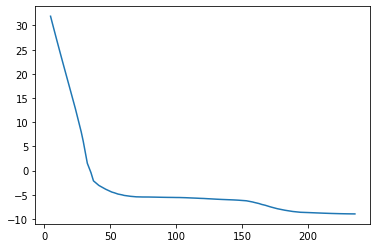

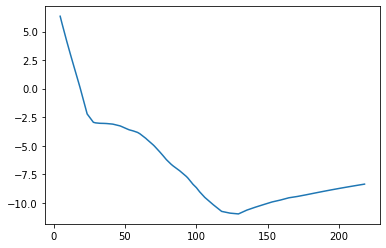

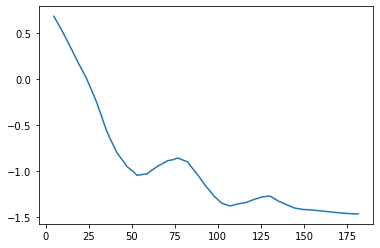

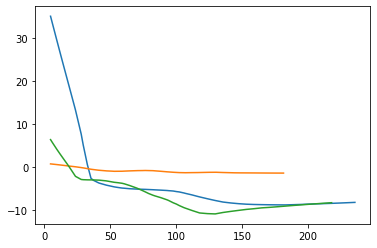

In [167]:
def regress(data, xvar, yvar):
    lowess = sm.nonparametric.lowess(xvar, yvar, frac = .3)
    X = list(zip(*lowess))[0]
    Y = list(zip(*lowess))[1]
    return (X,Y)

# McLaren
c1_mcl = regress(c1s_mcl, c1s_mcl.sec_diff, c1s_mcl.stint_distance)
plt.plot(c1_mcl[0], c1_mcl[1], '-')
plt.show()

# Merc
c1_mer = regress(c1s_mer, c1s_mer.sec_diff, c1s_mer.stint_distance)
plt.plot(c1_mer[0], c1_mer[1], '-')
plt.show()

# Racing Point
c1_rp = regress(c1s_rp, c1s_rp.sec_diff, c1s_rp.stint_distance)
plt.plot(c1_rp[0], c1_rp[1], '-')
plt.show()

# Williams
c1_wil = regress(c1s_wil, c1s_wil.sec_diff, c1s_wil.stint_distance)
plt.plot(c1_wil[0], c1_wil[1], '-')
plt.show()

# Renault
c1_ren = regress(c1s_ren, c1s_ren.sec_diff, c1s_ren.stint_distance)
plt.plot(c1_ren[0], c1_ren[1], '-')
plt.show()

# AlphaTauri 
c1_at = regress(c1s_at, c1s_at.sec_diff, c1s_at.stint_distance)
plt.plot(c1_at[0], c1_at[1], '-')
plt.show()

# Ferrari
c1_fer = regress(c1s_fer, c1s_fer.sec_diff, c1s_fer.stint_distance)
plt.plot(c1_fer[0], c1_fer[1], '-')
plt.show()

# Alfa 
c1_alf = regress(c1s_alf, c1s_alf.sec_diff, c1s_alf.stint_distance)
plt.plot(c1_alf[0], c1_alf[1], '-')
plt.show()

# Red Bull
c1_rb = regress(c1s_rb, c1s_rb.sec_diff, c1s_rb.stint_distance)
plt.plot(c1_rb[0], c1_rb[1], '-')
plt.show()

# Haas
c1_has = regress(c1s_has, c1s_has.sec_diff, c1s_has.stint_distance)
plt.plot(c1_has[0], c1_has[1], '-')
plt.show()

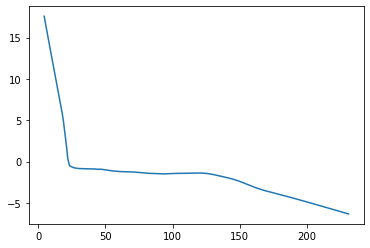

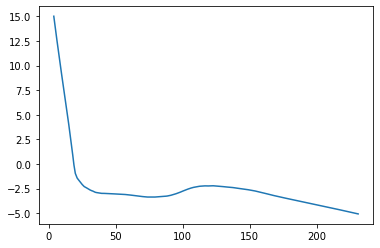

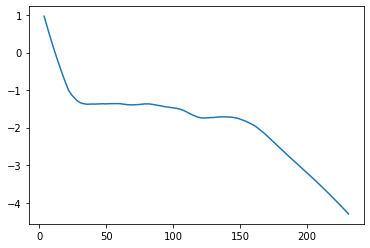

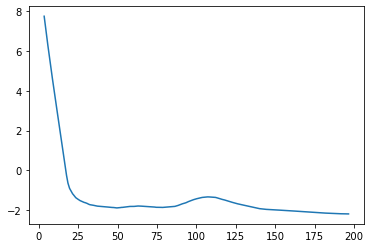

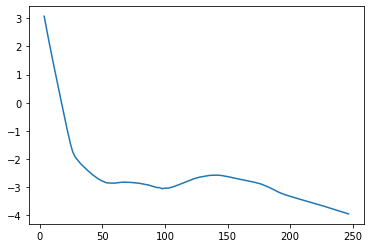

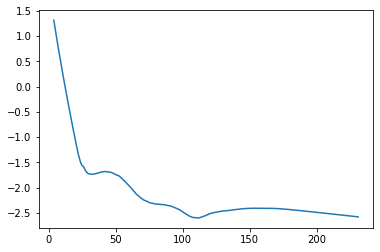

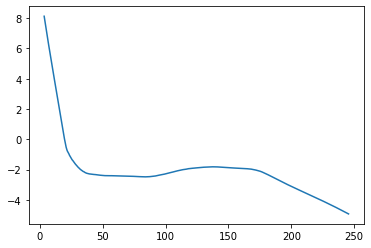

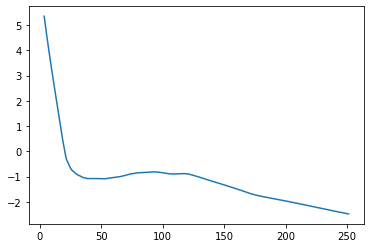

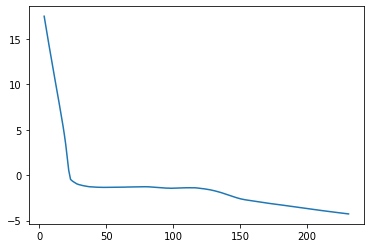

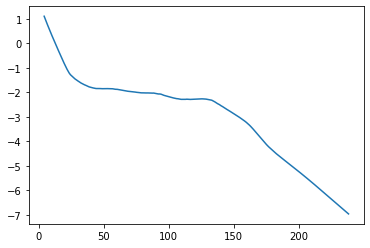

In [166]:
c2_mcl = regress(c2s_mcl, c2s_mcl.sec_diff, c2s_mcl.stint_distance)
plt.plot(c2_mcl[0], c2_mcl[1], '-')
plt.show()

c2_mer = regress(c2s_mer, c2s_mer.sec_diff, c2s_mer.stint_distance)
plt.plot(c2_mer[0], c2_mer[1], '-')
plt.show()

c2_rp = regress(c2s_rp, c2s_rp.sec_diff, c2s_rp.stint_distance)
plt.plot(c2_rp[0], c2_rp[1], '-')
plt.show()

c2_wil = regress(c2s_wil, c2s_wil.sec_diff, c2s_wil.stint_distance)
plt.plot(c2_wil[0], c2_wil[1], '-')
plt.show()

c2_ren = regress(c2s_ren, c2s_ren.sec_diff, c2s_ren.stint_distance)
plt.plot(c2_ren[0], c2_ren[1], '-')
plt.show()

c2_at = regress(c2s_at, c2s_at.sec_diff, c2s_at.stint_distance)
plt.plot(c2_at[0], c2_at[1], '-')
plt.show()

c2_fer = regress(c2s_fer, c2s_fer.sec_diff, c2s_fer.stint_distance)
plt.plot(c2_fer[0], c2_fer[1], '-')
plt.show()

c2_alf = regress(c2s_alf, c2s_alf.sec_diff, c2s_alf.stint_distance)
plt.plot(c2_alf[0], c2_alf[1], '-')
plt.show()

c2_rb = regress(c2s_rb, c2s_rb.sec_diff, c2s_rb.stint_distance)
plt.plot(c2_rb[0], c2_rb[1], '-')
plt.show()

c2_has = regress(c2s_has, c2s_has.sec_diff, c2s_has.stint_distance)
plt.plot(c2_has[0], c2_has[1], '-')
plt.show()

In [ ]:
https://stackoverflow.com/questions/45063260/finding-the-point-of-a-slope-change-as-a-free-parameter-python
    https://stackoverflow.com/questions/51640210/find-the-location-of-maximum-gradient-in-python

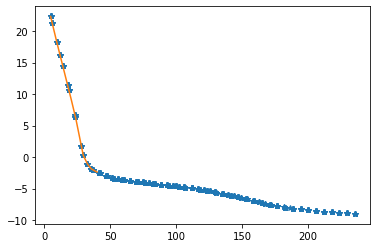

In [138]:
#c1s
c1_s_lowess = sm.nonparametric.lowess(c1s.sec_diff, c1s.stint_distance, frac=.3)
lowess_x = list(zip(*c1_s_lowess))[0]
lowess_y = list(zip(*c1_s_lowess))[1]
# run scipy's interpolation. There is also extrapolation I believe
f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = [i/10. for i in range(400)]

# this this generate y values for our xvalues by our interpolator
# it will MISS values outsite of the x window (less than 3, greater than 33)
# There might be a better approach, but you can run a for loop
#and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
ynew = f(xnew)


#plt.plot(c1s.stint_distance, c1s.sec_diff, 'o')
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()

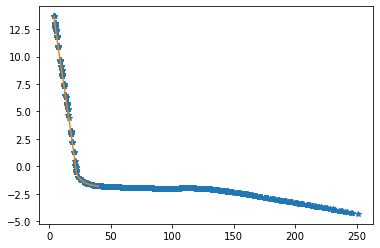

In [104]:
#c2s
c2_s_lowess = sm.nonparametric.lowess(c2s.sec_diff, c2s.stint_distance, frac=.3)
lowess_x = list(zip(*c2_s_lowess))[0]
lowess_y = list(zip(*c2_s_lowess))[1]
# run scipy's interpolation. There is also extrapolation I believe
f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = [i/10. for i in range(400)]

# this this generate y values for our xvalues by our interpolator
# it will MISS values outsite of the x window (less than 3, greater than 33)
# There might be a better approach, but you can run a for loop
#and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
ynew = f(xnew)


#plt.plot(c2s.stint_distance, c2s.sec_diff, 'o')
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()

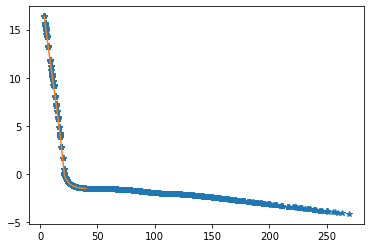

In [52]:
#c3s
c3_s_lowess = sm.nonparametric.lowess(c3s.sec_diff, c3s.stint_distance, frac=.3)
lowess_x = list(zip(*c3_s_lowess))[0]
lowess_y = list(zip(*c3_s_lowess))[1]
# run scipy's interpolation. There is also extrapolation I believe
f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = [i/10. for i in range(400)]

# this this generate y values for our xvalues by our interpolator
# it will MISS values outsite of the x window (less than 3, greater than 33)
# There might be a better approach, but you can run a for loop
#and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
ynew = f(xnew)


#plt.plot(c3s.stint_distance, c3s.sec_diff, 'o')
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()

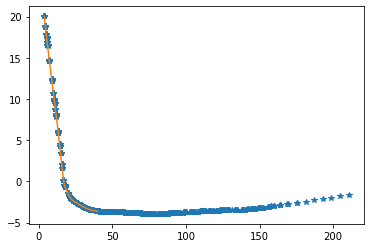

In [105]:
#c4s
c4_s_lowess = sm.nonparametric.lowess(c4s.sec_diff, c4s.stint_distance, frac=.3)
lowess_x = list(zip(*c4_s_lowess))[0]
lowess_y = list(zip(*c4_s_lowess))[1]
# run scipy's interpolation. There is also extrapolation I believe
f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = [i/10. for i in range(400)]

# this this generate y values for our xvalues by our interpolator
# it will MISS values outsite of the x window (less than 3, greater than 33)
# There might be a better approach, but you can run a for loop
#and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
ynew = f(xnew)


#plt.plot(c4s.stint_distance, c4s.sec_diff, 'o')
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()

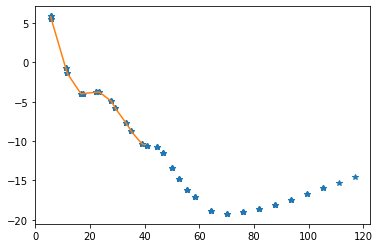

In [50]:
#c5s
c5_s_lowess = sm.nonparametric.lowess(c5s.sec_diff, c5s.stint_distance, frac=.3)
lowess_x = list(zip(*c5_s_lowess))[0]
lowess_y = list(zip(*c5_s_lowess))[1]
# run scipy's interpolation. There is also extrapolation I believe
f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = [i/10. for i in range(400)]

# this this generate y values for our xvalues by our interpolator
# it will MISS values outsite of the x window (less than 3, greater than 33)
# There might be a better approach, but you can run a for loop
#and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
ynew = f(xnew)


#plt.plot(c5s.stint_distance, c5s.sec_diff, 'o')
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()

3. When was each tyre used
    - Compare over total race distance
    - Compare data from each team
    - Avg position for tyre

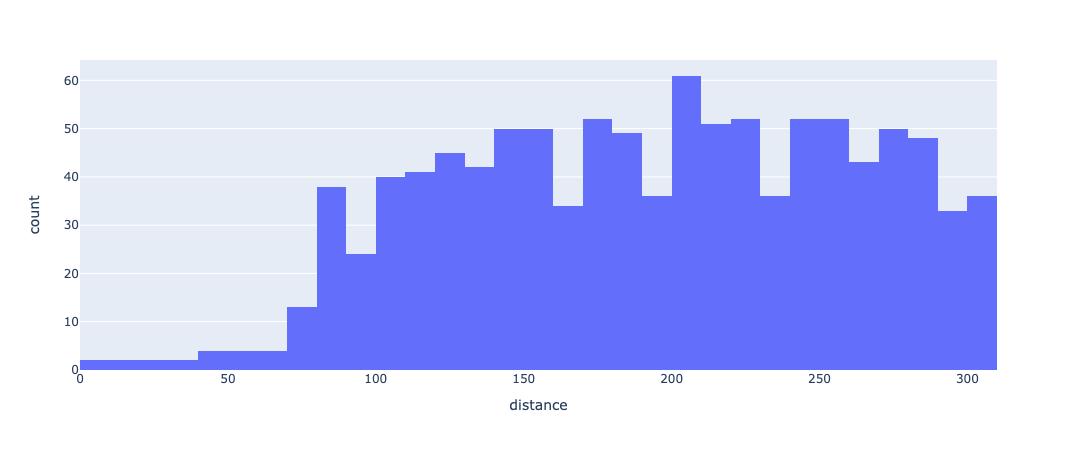

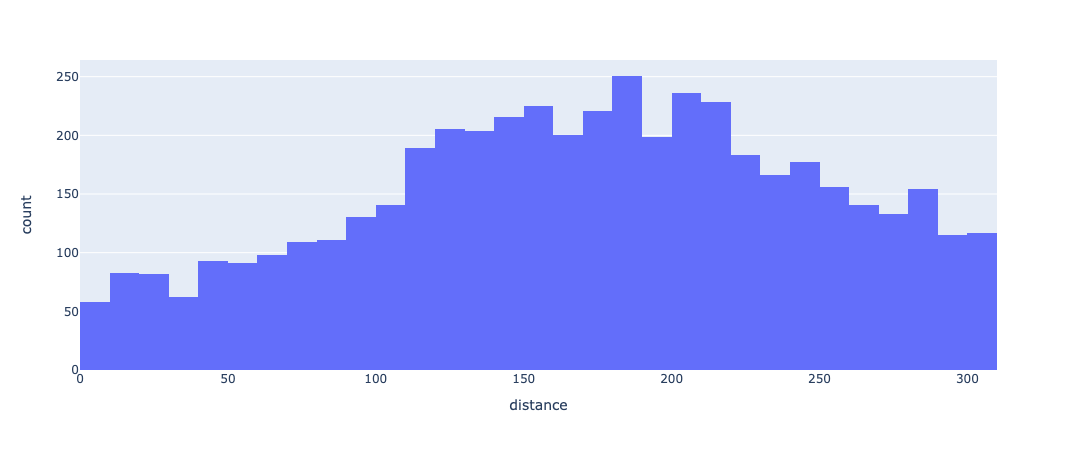

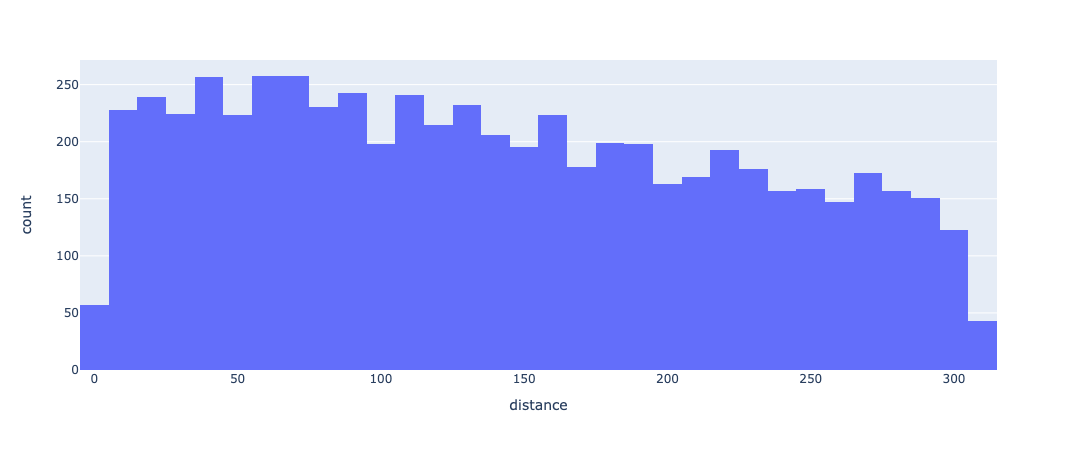

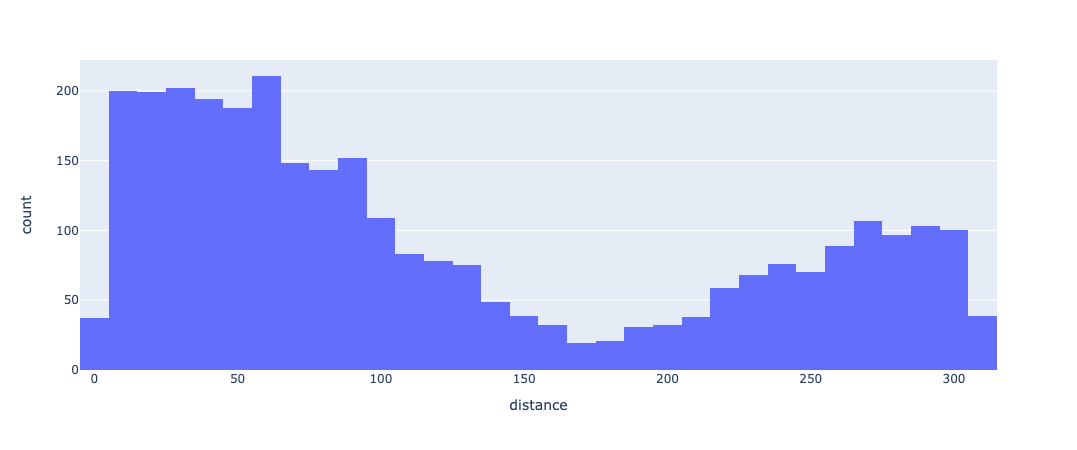

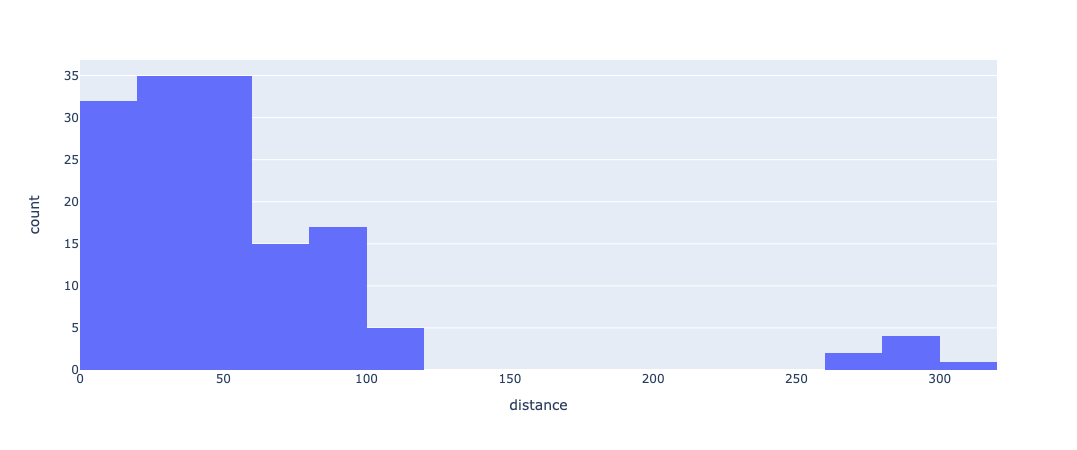

In [106]:
# c1
c1_hist = px.histogram(c1, x = "distance")
c1_hist.show()
#c2 
c2_hist = px.histogram(c2, x = "distance")
c2_hist.show()
#c3 
c3_hist = px.histogram(c3, x = "distance")
c3_hist.show()
#c4
c4_hist = px.histogram(c4, x = "distance")
c4_hist.show()
#c5
c5_hist = px.histogram(c5, x = "distance")
c5_hist.show()

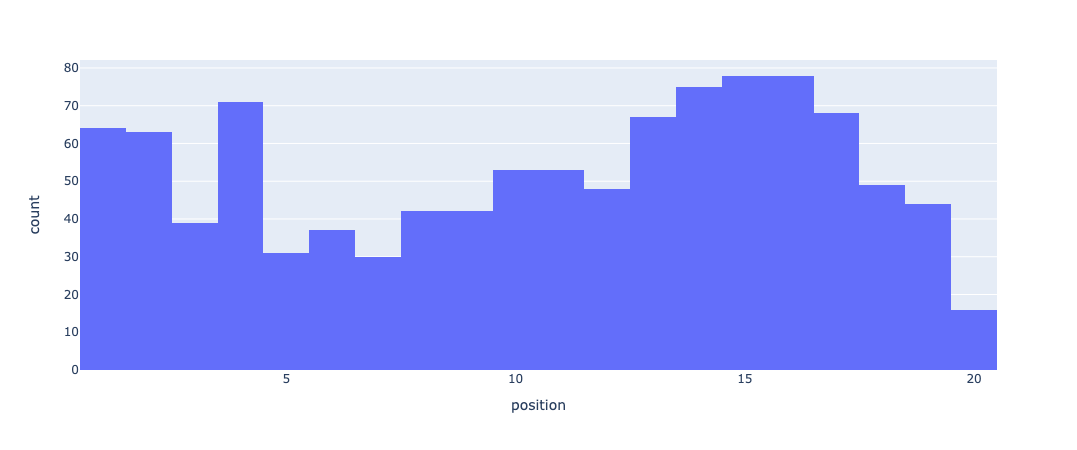

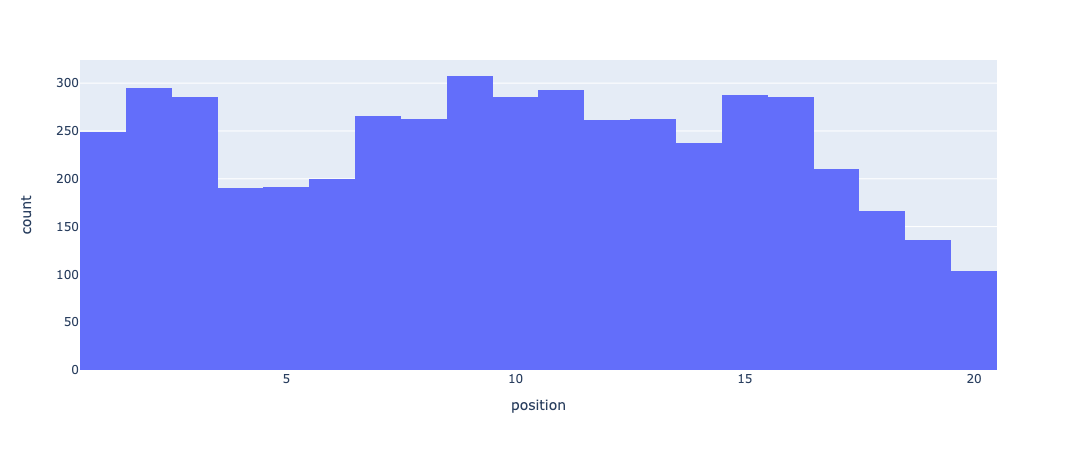

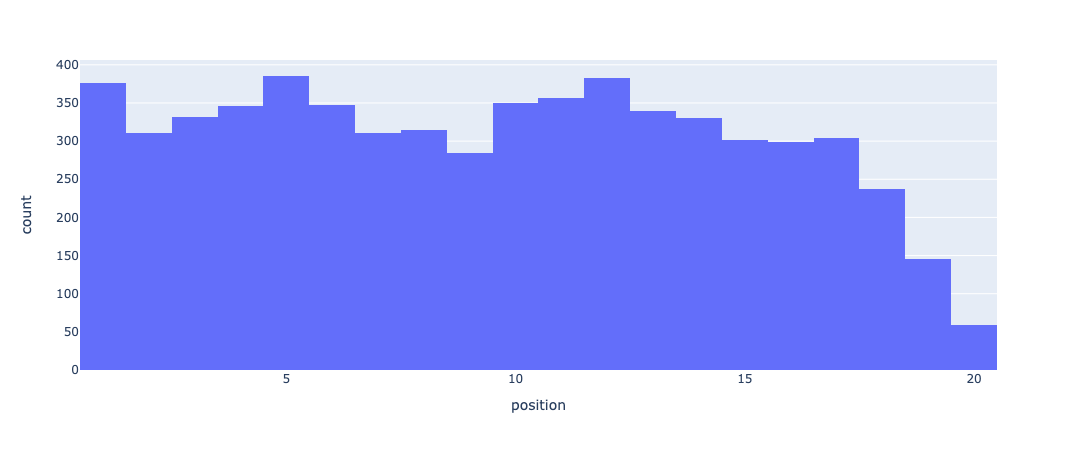

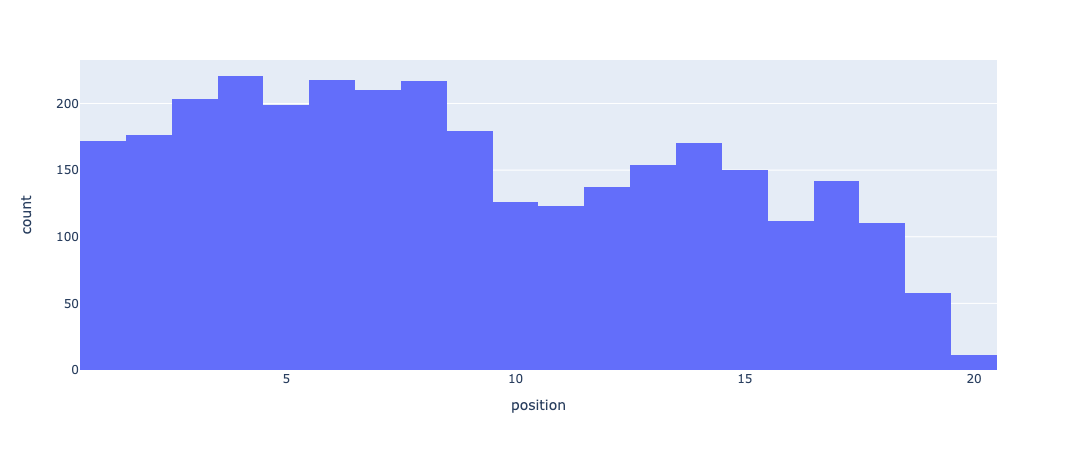

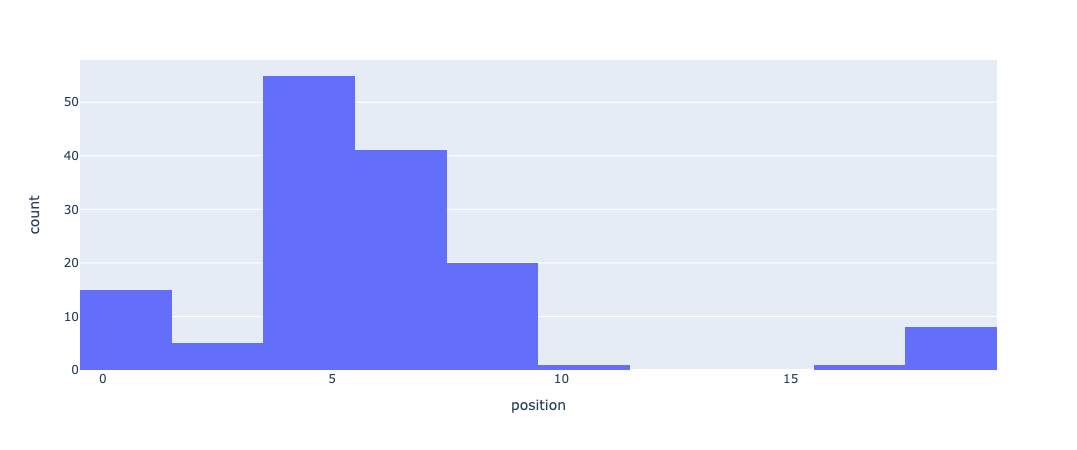

In [107]:
# c1
c1_hist = px.histogram(c1, x = "position")
c1_hist.show()
#c2 
c2_hist = px.histogram(c2, x = "position")
c2_hist.show()
#c3 
c3_hist = px.histogram(c3, x = "position")
c3_hist.show()
#c4
c4_hist = px.histogram(c4, x = "position")
c4_hist.show()
#c5
c5_hist = px.histogram(c5, x = "position")
c5_hist.show()

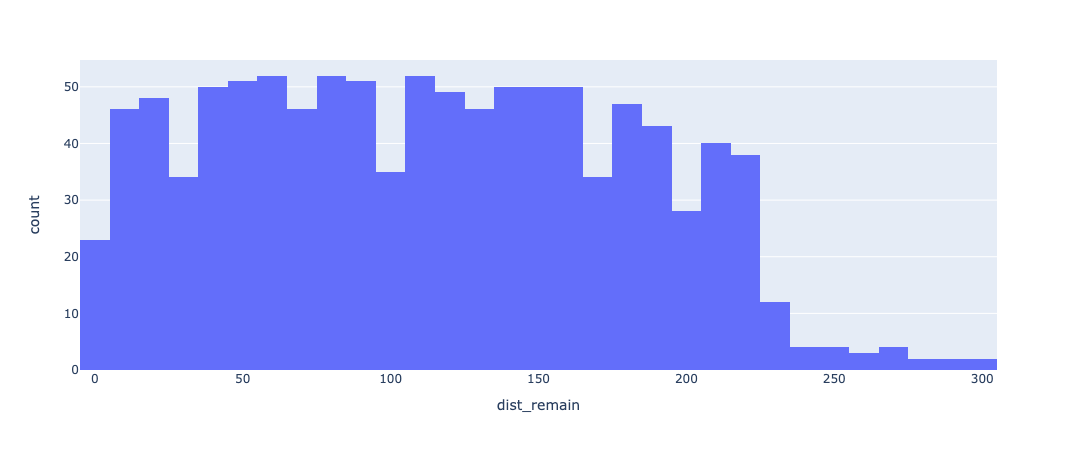

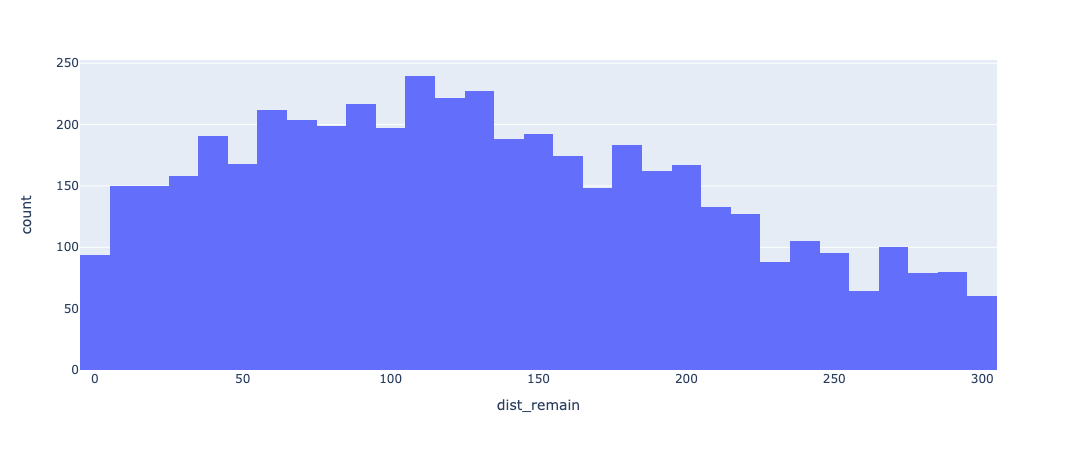

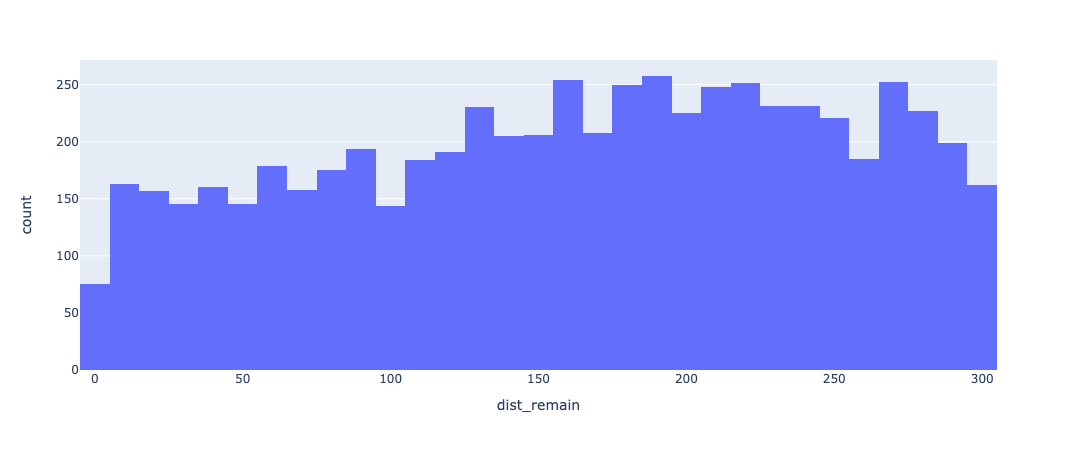

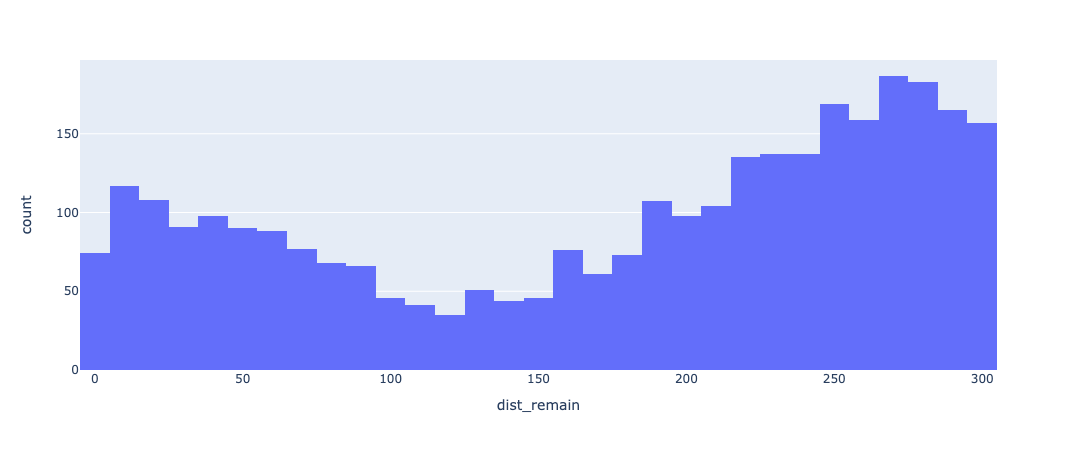

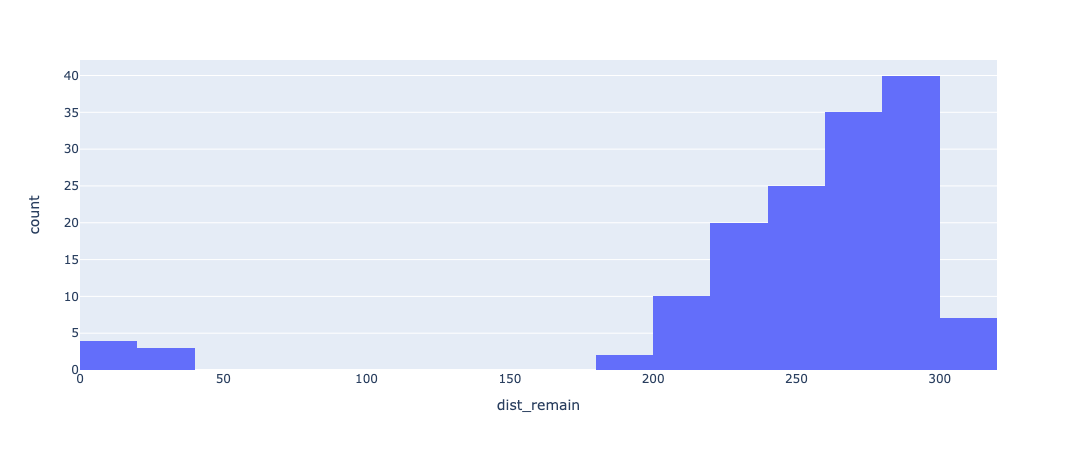

In [178]:
# c1
c1_hist = px.histogram(c1, x = "dist_remain")
c1_hist.show()
#c2 
c2_hist = px.histogram(c2, x = "dist_remain")
c2_hist.show()
#c3 
c3_hist = px.histogram(c3, x = "dist_remain")
c3_hist.show()
#c4
c4_hist = px.histogram(c4, x = "dist_remain")
c4_hist.show()
#c5
c5_hist = px.histogram(c5, x = "dist_remain")
c5_hist.show()